In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats,integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True) #调整调色板
np.random.seed(sum(map(ord,'distributions')))

In [5]:
import datetime
import matplotlib.dates as mpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import time
from matplotlib import gridspec
from pandas import DataFrame
from pandas import Series
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 灰度图
最方便快捷的方式

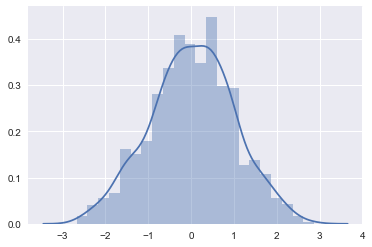

In [6]:
x = np.random.normal(size=1000) # 单维度 正态分布
sns.distplot(x,kde=True)

想要更精细的刻画，使用 bins

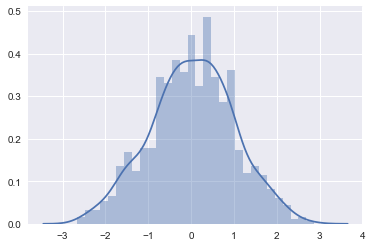

In [19]:
sns.distplot(x, kde=True, bins=30)

配合实例一起看

好处：引导你设置合适的 bins(调节有多少个分桶)

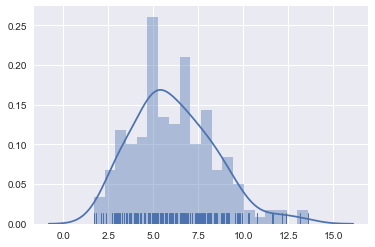

In [25]:
# rug：底下的每个桶都是一个样本，以实际的取值画在样本上
sns.distplot(x, kde=True, bins=20, rug=True) # rug 展开小样本

### 核密度估计
通过观测估计概率密度函数的形状。有什么用呢?待定系数法求概率密度函数

核密度估计步骤：
- 每一个观测附近用一个正态分布曲线近似
- 叠加所有观测的正太分布曲线
- 归一化

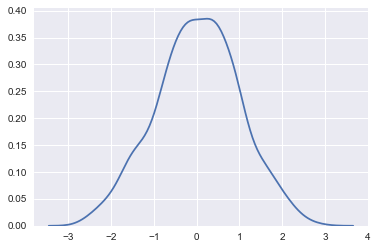

In [21]:
sns.kdeplot(x)

bandwidth 的概念：用于近似的正态分布曲线的宽度

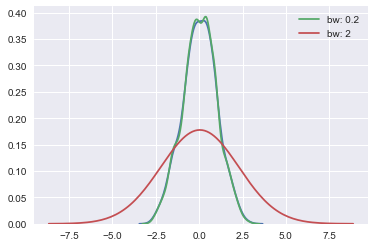

In [22]:
sns.kdeplot(x)
sns.kdeplot(x, bw = .2, label = 'bw: 0.2')
sns.kdeplot(x, bw = 2, label = 'bw: 2')
plt.legend()

### 模型参数拟合

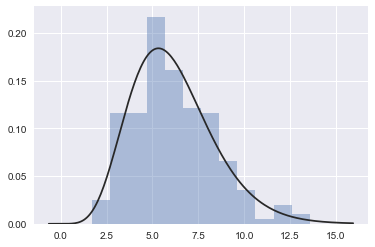

In [23]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

### 双变量分布

In [29]:
mean , cov = [0,1], [(1,.5),(.5,1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])
df.head()

,x,y
0,1.290951,1.119282
1,-0.972914,1.724685
2,0.952247,2.899093
3,0.240968,-0.408856
4,-0.000748,1.490226


两个相关的正态分布
### 散点图
将 DataFrame 的 x，y 在这幅图上作为横纵坐标绘制出来

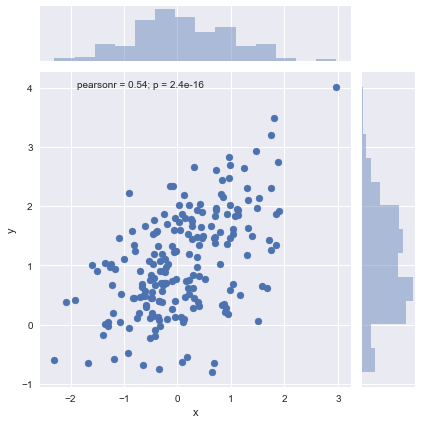

In [27]:
sns.jointplot(x='x', y='y', data=df)

### 六角箱图
以颜色深浅绘制，数据量多的时候比较实用

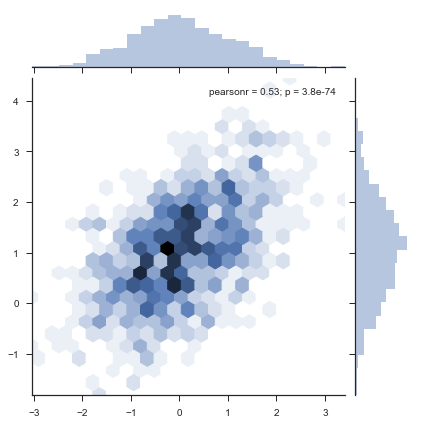

In [30]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style('ticks'):
    sns.jointplot(x=x, y=y, kind='hex')

### 核密度估计

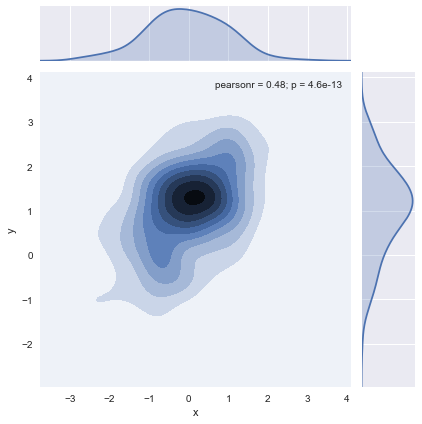

In [31]:
sns.jointplot(x='x', y='y', data=df, kind='kde')

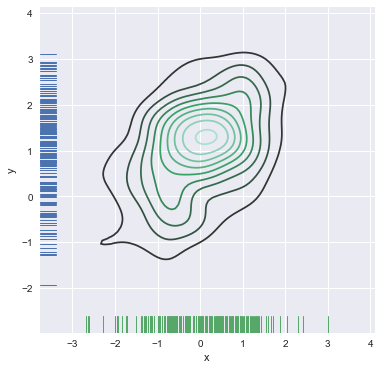

In [34]:
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color='g', ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

想看更连续的梦幻效果

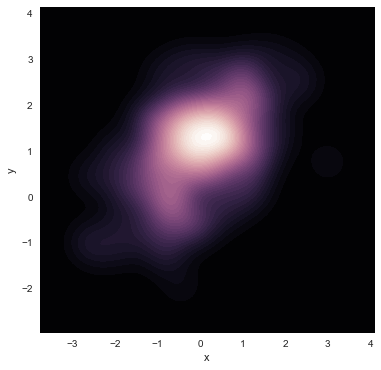

In [35]:
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0)
sns.kdeplot(df.x, df.y, cmap = cmap, n_levels=60, shade=True)

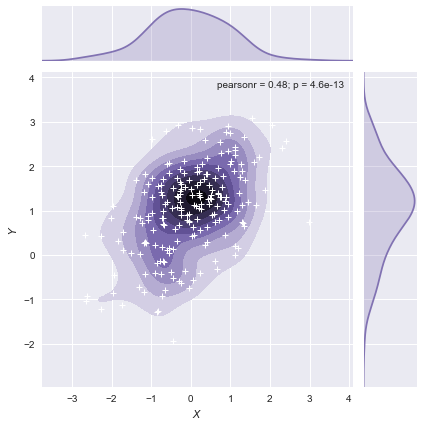

In [40]:
g = sns.jointplot(x = 'x', y = 'y', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

### 数据集中的两两关系 

In [41]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


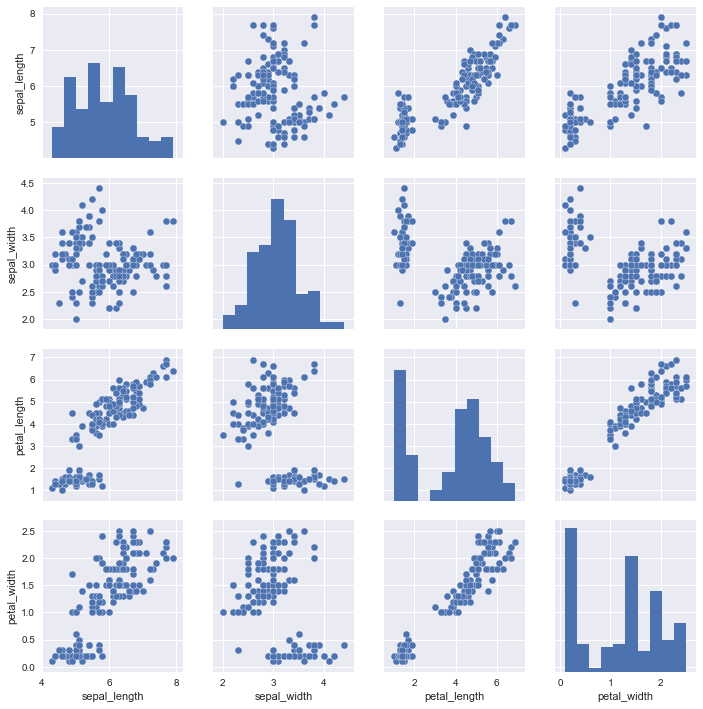

In [42]:
sns.pairplot(iris)

属性两两间的关系 + 属性的灰度图

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


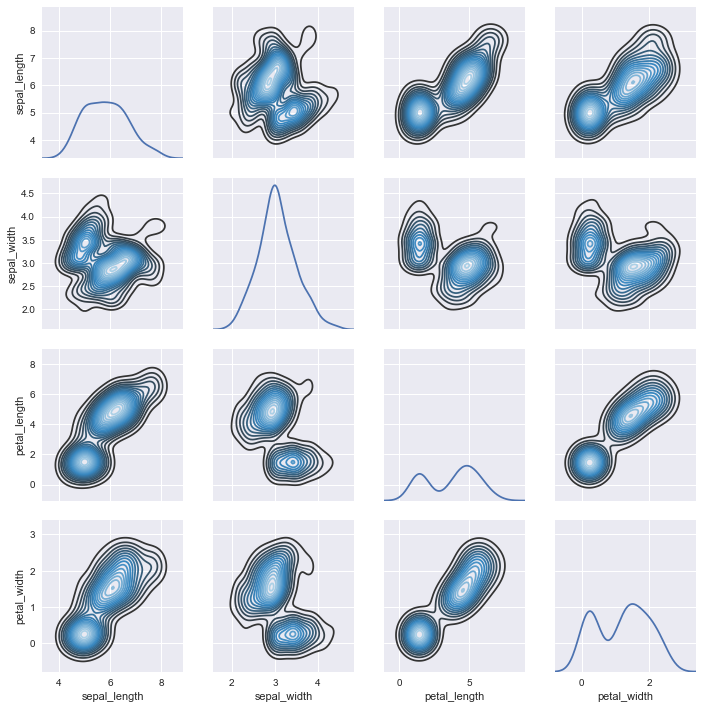

In [44]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap='Blues_d', n_levels=20)